**CSI 4142 Data Science** <br/>
*Assignment 1: Dataset Insights*

# Identification

Name: Eli Wynn<br/>
Student Number: 300248135

Name: Jack Snelgrove<br/>
Student Number: 300247435


Our datasets have been uploaded from the public repository:

- [github.com/eli-wynn/Datasets](https://github.com/eli-wynn/Datasets)

# Introduction

The goal of this report is to perform data analysis on a heart attack database and student placement dataset. The audience would be the general public wanting to learn about factors that could lead to a heart attack and students/educators wanting to examine student results after graduation respectively.

Imports:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Datasets

In [23]:
heart  = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/heart.csv"
placement = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/placementdata.csv"
heartData = pd.read_csv(heart)
placementData = pd.read_csv(placement)

# Dataset Descriptions
## [Placement Data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)
Author: RK <br>
Purpose: This dataset contains information about the students academic and training and placement status<br>
Shape: Columns: 12, Rows: 10000<br>
## [Heart Data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
Author: fedesoriano <br>
Purpose:<br>
Shape: Columns: 12, Rows: 918<br>

# Heart Failure Prediction Insights

All the proof of the insights is present in the code and subsequent table directly below the insight

1. The risk of heart problems increases dramatically after age 40 and drops off after 60. It is interesting that there is a drop off with age. Is that due to less older people being included in the data? or less older people surviving with a heart condition?

In [ ]:
plt.hist(heartData['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

2. Approximately _% of individuals included have heart disease

In [ ]:
#code for a countplot from case study in class
sns.countplot(x="HeartDisease", palette="pastel", data=heartData)
plt.title("Individuals With Heart Disease")
plt.xlabel('Heart Disease(0 = Healthy, 1 = Diseased)')
plt.ylabel('Count')
plt.show()

## Placement Insight

All insights are initiated with a question. Code is provided for a visualization that answers this question. The insight derived from these graphs are provided in the cell under the graph. 

1. How many student got Placed vs Not placed?

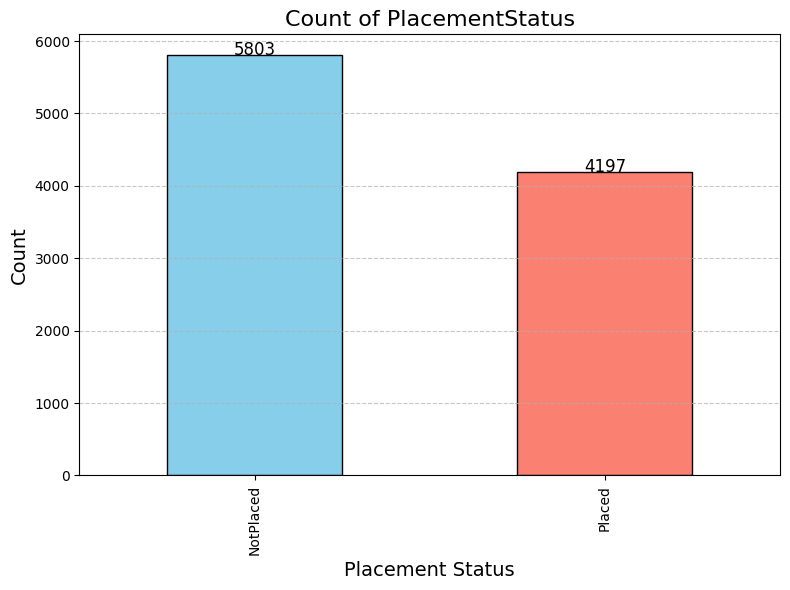

In [44]:
# r2

#Creates a pandas Series that represnts the count of students who are Placed vs NotPlaced
status_counts = placementData['PlacementStatus'].value_counts()

#Define the figure size
plt.figure(figsize=(8, 6))

#Creates a bar chart with the status_counts Series
status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Count of PlacementStatus', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add the exact count on top of each bar
plt.text(1, status_counts['Placed'] + 1, f"{status_counts['Placed']}", ha='center', fontsize=12)
plt.text(0, status_counts['NotPlaced'] + 1, f"{status_counts['NotPlaced']}", ha='center', fontsize=12)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Insight #1: Based on the chart above, ~58% of the students were placed in internships <br><br>
1. Did the number of completed internships effect the number of students who got placed? 

<Figure size 1000x600 with 0 Axes>

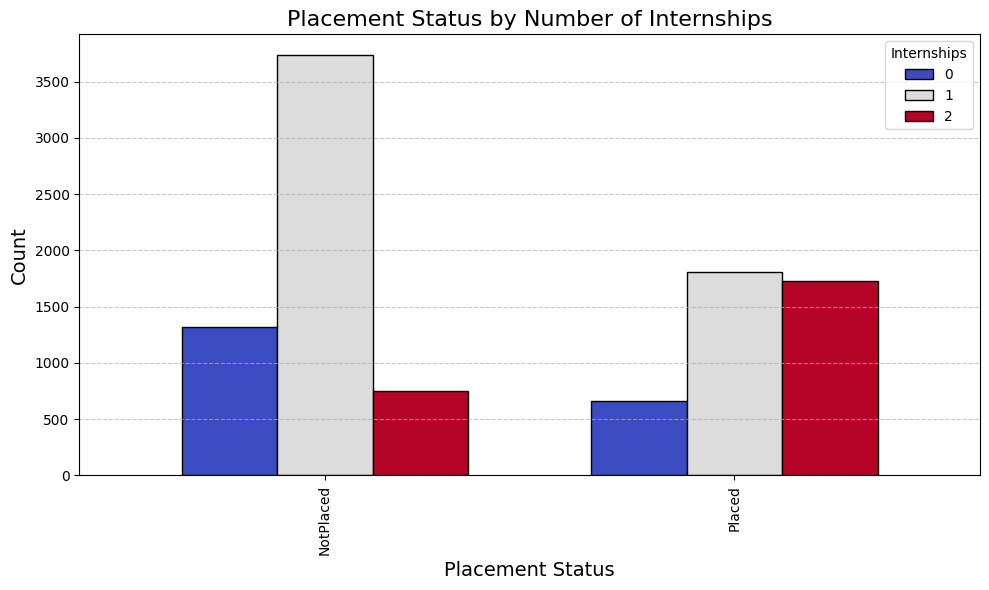

In [42]:
# r4 (with aditional split)

# Grouping data by PlacementStatus and Internships
status_internship_counts = placementData.groupby(['PlacementStatus', 'Internships']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
status_internship_counts.plot(kind='bar', width=0.7, edgecolor='black', colormap='coolwarm', figsize=(10, 6))

# Adding labels and title
plt.title('Placement Status by Number of Internships', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Internships')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Insight #2: Based on the graph above, the majority of students who had 2 internships completed were able to get Placed. For Students who have only completed one or no internships had a higher chance of not placing than being placed. 

3. Did students who got placed have better CGPAs than those who didnt?


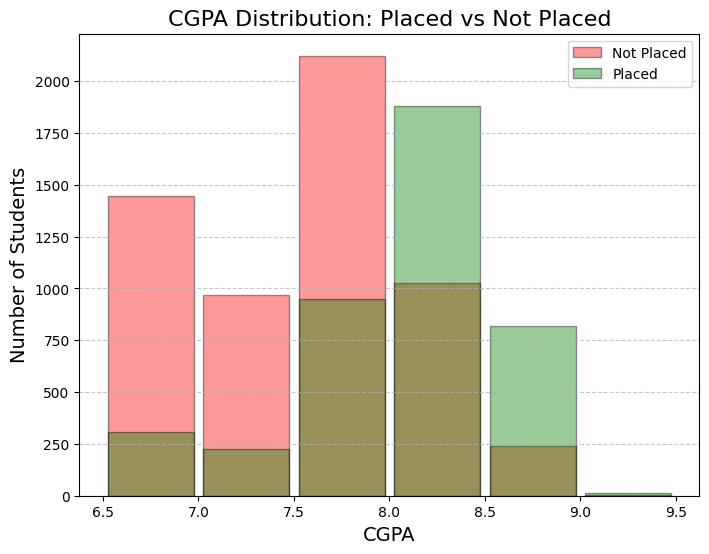

In [43]:
# r7

# Define bins from minimum to maximum CGPA, at 0.5 intervals
min_cgpa = min(placementData['CGPA'])
max_cgpa = max(placementData['CGPA'])
bins = np.arange(min_cgpa, max_cgpa + 0.5, 0.5)  # Step size of 0.5

# Filter CGPA values based on PlacementStatus
placed_cgpa = placementData[placementData['PlacementStatus'] == 'Placed']['CGPA']
not_placed_cgpa = placementData[placementData['PlacementStatus'] == 'NotPlaced']['CGPA']

# Create the plot
plt.figure(figsize=(8, 6))

plt.hist(not_placed_cgpa, bins=bins, color='red', alpha=0.4, label='Not Placed', edgecolor='black', rwidth=0.9)
plt.hist(placed_cgpa, bins=bins, color='green', alpha=0.4, label='Placed', edgecolor='black', rwidth=0.9)



# Labels and title
plt.title('CGPA Distribution: Placed vs Not Placed', fontsize=16)
plt.xlabel('CGPA', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Set x-axis ticks at every 0.5 interval
plt.xticks(bins)

# Show legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Insight #3: It shows in the graph above that in the majority of cases students who got placed typically had higher CGPAs that those who did not. However, the graph also shows that some students who had a high CGPAs did not place and some students with low CGPAs were able to find placements. 

4. How are the surveyed student soft skills

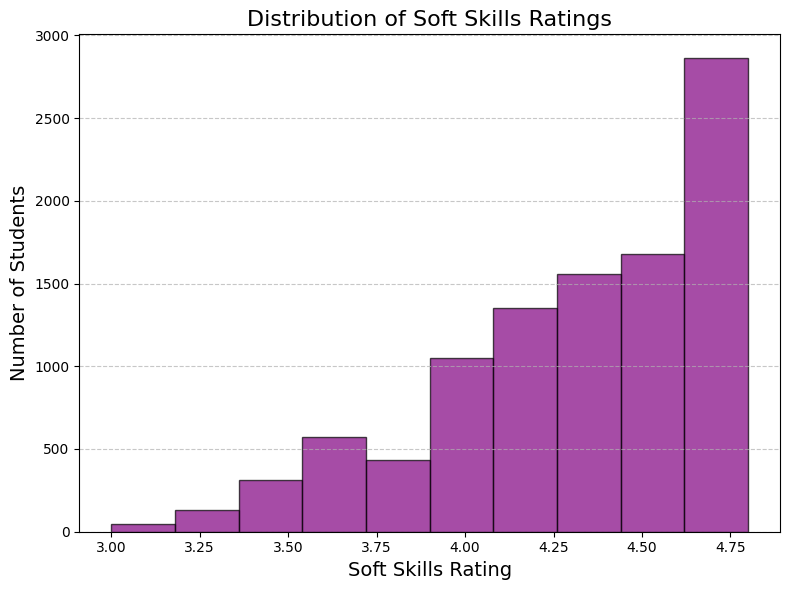

In [45]:
# r1

# Define figure size
plt.figure(figsize=(8, 6))

# Plot histogram for Soft Skills Rating (Decimal & Continuous)
plt.hist(placementData['SoftSkillsRating'], bins=10, color='purple', edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Soft Skills Ratings', fontsize=16)
plt.xlabel('Soft Skills Rating', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


Insight #4: The graph above is left skewed showing us that most of the students have high soft skills rating. 